# Handmade SVM Implementation

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from robsvm import robsvm
from cvxopt import matrix, normal

## Functions

In [6]:
def find_weights(X, y):
    """
        Solves the following robust SVM training problem:

           minimize    (1/2) w'*w + gamma*sum(v)
           subject to  diag(d)*(X*w + b*1) >= 1 - v + E*u
                       || S_j*w ||_2 <= u_j,  j = 1...t
                       v >= 0

        The variables are w, b, v, and u. The matrix E is a selector
        matrix with zeros and one '1' per row.  E_ij = 1 means that the
        i'th training vector is associated with the j'th uncertainty
        ellipsoid.

        A custom KKT solver that exploits low-rank structure is used, and
        a positive definite system of equations of order n is
        formed and solved at each iteration.
    """
    m, n = X.shape
    gamma = 0.7
    
    d = matrix(y, (m,1))
    X = matrix(X)
    
    # generate uncertainty ellipsoids
    k = 2
    P = [0.1*normal(4*n,n) for i in range(k)]
    P = [ p.T*p for p in P]
    
    e = matrix(0,(m,1))
    for i in range(m):
        if d[i] == 1:
            e[i] = 1

            
    # solve SVM training problem
    w, b, u, v, iterations = robsvm(X, d, gamma, P, e)

    return w, b

    
def predict(X, W, bias):
    weights = W[:2]
    predictions = np.dot(X, weights) + bias
    predictions[predictions > 0] = 1
    predictions[predictions < 0] = -1
    
    return predictions 

## Load the dataset

In [3]:
iris = load_iris()
X = iris.data[:100] #First two features
y = iris.target[:100]
y[y<1] = -1

## Train SVM

In [7]:
weights, bias = find_weights(X, y)

     pcost       dcost       gap    pres   dres
 0: -4.7576e+01  8.7014e+01  5e+02  3e+00  3e+01
 1:  3.3573e+01 -2.4040e+01  8e+01  3e-01  3e+00
 2:  6.2750e+00 -2.0763e+00  1e+01  3e-02  3e-01
 3:  1.6941e+00  3.3787e-01  2e+00  4e-03  4e-02
 4:  1.2770e+00  5.9928e-01  8e-01  2e-03  2e-02
 5:  1.1345e+00  7.8081e-01  4e-01  1e-05  1e-04
 6:  1.0019e+00  8.7532e-01  1e-01  2e-06  2e-05
 7:  9.4738e-01  9.1018e-01  4e-02  4e-16  5e-16
 8:  9.2746e-01  9.2579e-01  2e-03  5e-16  5e-16
 9:  9.2662e-01  9.2658e-01  4e-05  6e-16  5e-16
10:  9.2660e-01  9.2660e-01  5e-07  2e-15  1e-14
Optimal solution found.


## Visualizations

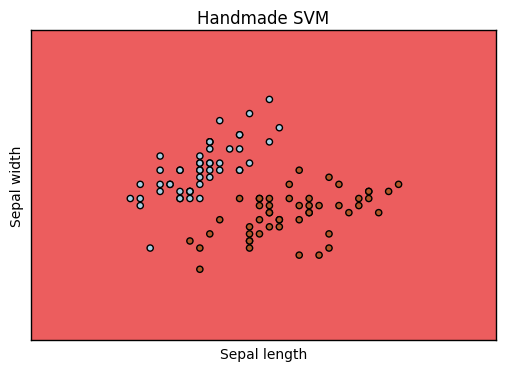

In [10]:
h = .02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = predict(np.c_[xx.ravel(), yy.ravel()], weights, bias)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Handmade SVM')

plt.show()

For some reason, it is classifying everything red. I couldn't figure out why.